In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

from liggghts_file_parsing import get_dt, create_bond_df, create_atom_df

%config InlineBackend.figure_format = 'retina'

# streamlined visualization

In [9]:
directory = r"\\wsl$\Ubuntu-18.04\home\arlenlex\LIGGGHTS_SEAICE\lexi_tests\contact_law_test\post"
log_file_path = r"\\wsl$\Ubuntu-18.04\home\arlenlex\LIGGGHTS_SEAICE\lexi_tests\contact_law_test\log.liggghts"

In [10]:
dt = get_dt(log_file_path)
df_bond = create_bond_df(directory)
df_atom = create_atom_df(directory)

# plot

In [11]:
def plot_relevant_quantities(df_atom, df_bond, dt, simulation_num):
    fig, axes = plt.subplots(2,2, layout = 'constrained', sharex=True, figsize = (8,6))
    ax = axes.flatten()

    fig.suptitle(f'simulation: {simulation_num}')

    plt.sca(ax[0])
    id = 1
    plt.plot(df_atom.index.values * dt, df_atom[id]['atom_fmag'], 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, df_atom[id]['atom_fmag'], 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$|F_a|$ [N]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[1])
    id = 1
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['x'].values - df_atom[id]['x'].values[0]), 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['x'].values - df_atom[id]['x'].values[0]), 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$\Delta x$ [m]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[2])
    id = 1
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['vx'].values), 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, np.abs(df_atom[id]['vx'].values) , 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$|v_x|$ [m/s]')
    plt.xlabel('time [s]')
    plt.grid(True)
    plt.legend()

    plt.sca(ax[3])
    id = 1
    plt.plot(df_atom.index.values * dt, df_atom[id]['fx'], 'o-', color = 'r', lw = 0.5, markersize = 1, label = f'id = {id}')
    id = 2
    plt.plot(df_atom.index.values * dt, df_atom[id]['fx'], 'o-', color = 'b', lw = 0.5, markersize = 1, label = f'id = {id}')
    plt.ylabel(r'$F_x$ [N]')
    plt.xlabel('time [s]')
    plt.grid(True)
    plt.legend()

    plt.close()

    return fig

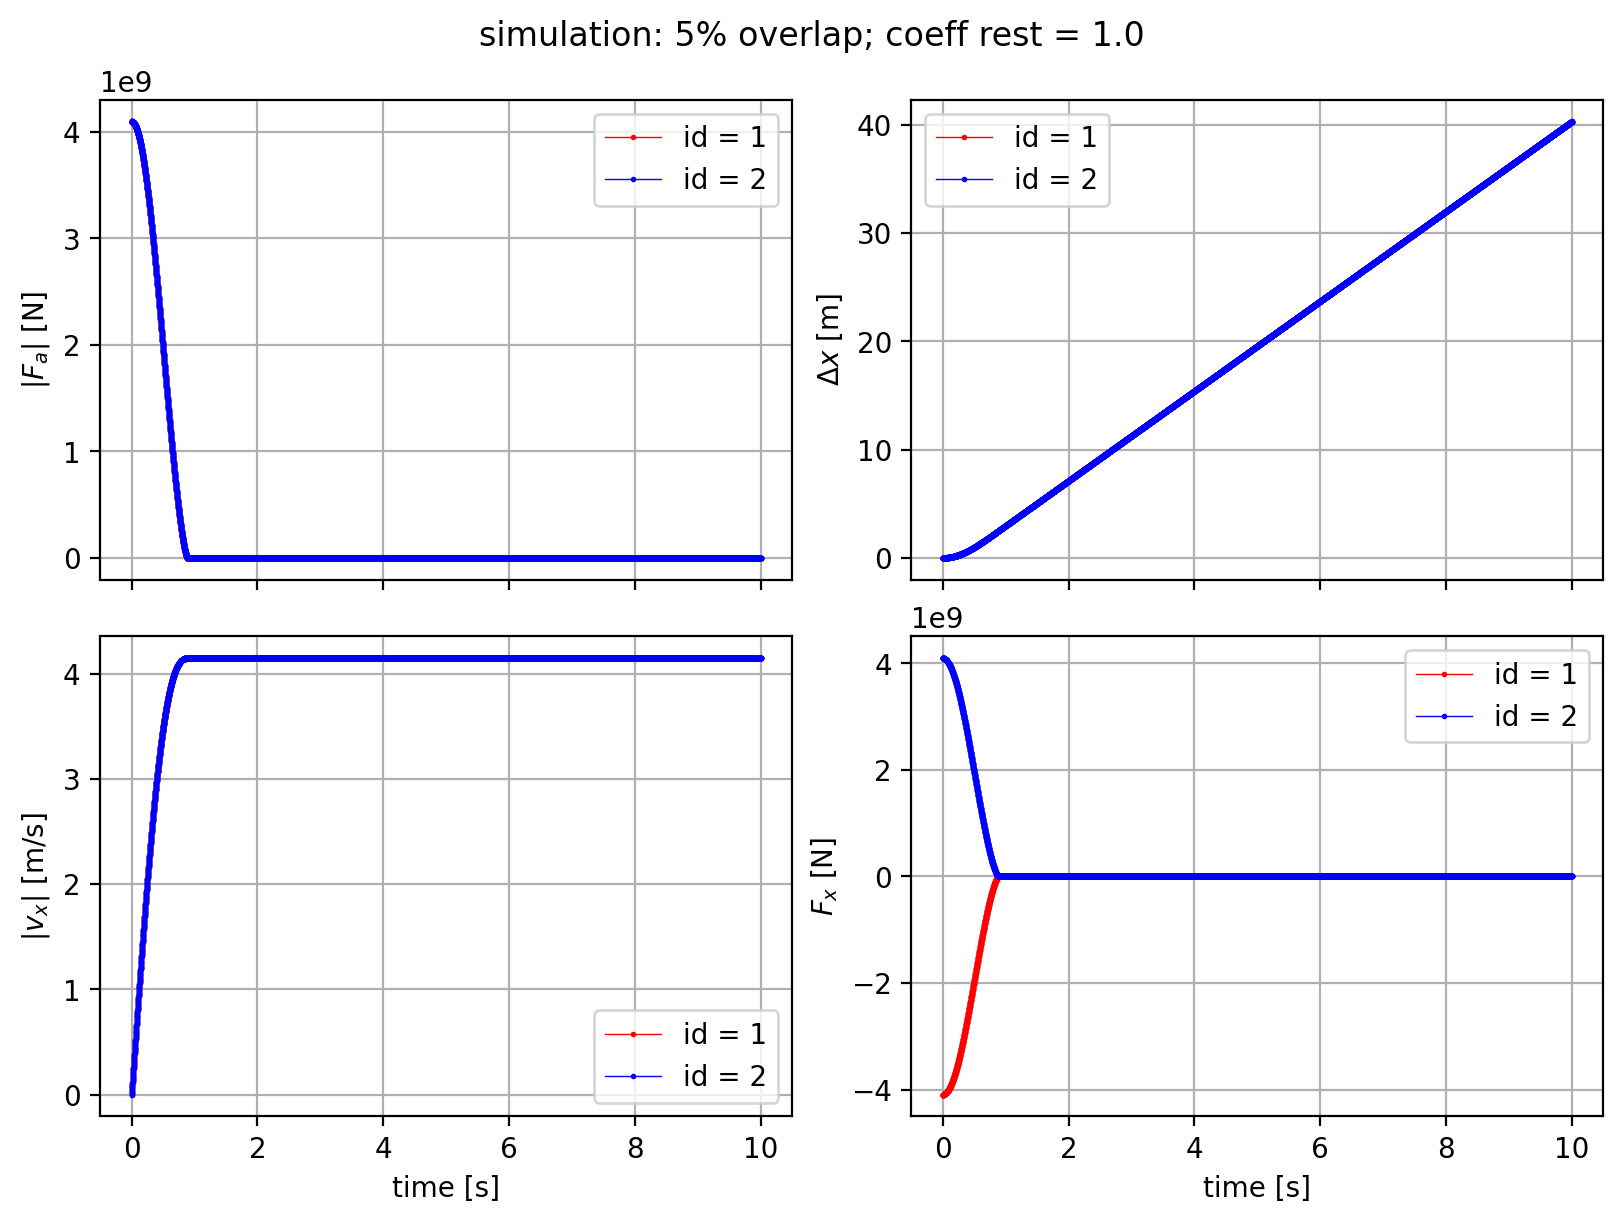

In [14]:
plot_relevant_quantities(df_atom, df_bond, dt, r'5% overlap; coeff rest = 1.0')

# save gif of simulation

MovieWriter Pillow unavailable; using Pillow instead.


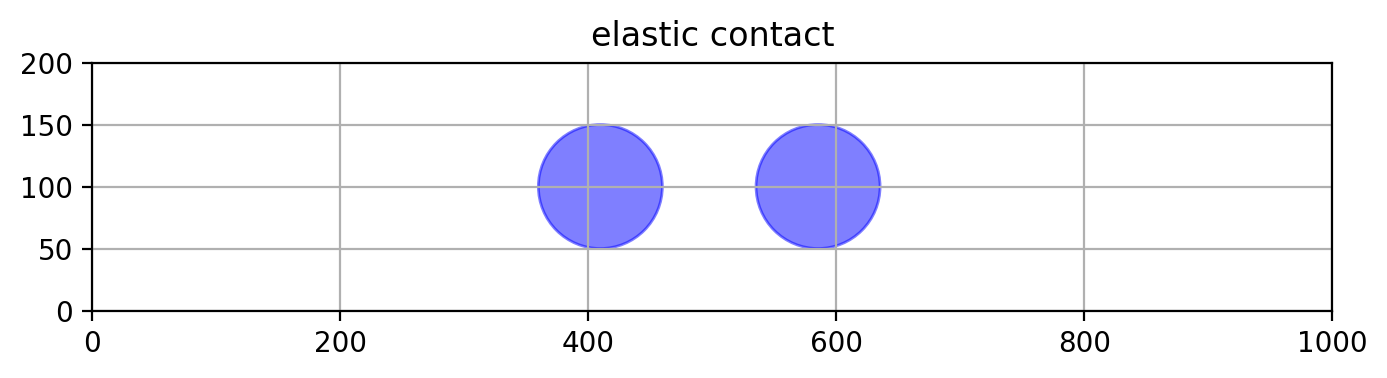

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

# Dictionary to store circle objects for each atom
circles = {}

# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in df_atom.keys())

# Initialize circles at their initial positions
for atom_id in unique_atoms:
    initial_x = df_atom[(atom_id, 'x')].iloc[0]
    initial_y = df_atom[(atom_id, 'y')].iloc[0]
    radius = df_atom[(atom_id, 'radius')].iloc[0]
    circle = Circle((initial_x, initial_y), radius, color='blue', alpha=0.5)
    ax.add_patch(circle)
    circles[atom_id] = circle

# Set plot limits
x_range = [df_atom[(atom_id, 'x')].min() for atom_id in unique_atoms] + [df_atom[(atom_id, 'x')].max() for atom_id in unique_atoms]
y_range = [df_atom[(atom_id, 'y')].min() for atom_id in unique_atoms] + [df_atom[(atom_id, 'y')].max() for atom_id in unique_atoms]
ax.set_xlim(0,1000)
ax.set_ylim(0,200)
ax.set_aspect('equal', 'box')
ax.grid()

# Update function for animation
def update(frame):
    for atom_id in unique_atoms:
        new_x = df_atom[(atom_id, 'x')].iloc[frame]
        new_y = df_atom[(atom_id, 'y')].iloc[frame]
        circles[atom_id].center = (new_x, new_y)
    return circles.values()

N = 50
# Define the frames to use for the animation (every 50th frame)
frame_indices = range(0, len(df_atom[(next(iter(unique_atoms)), 'x')]), N)

# Create and save the animation
anim = FuncAnimation(fig, update, frames=frame_indices, blit=True, repeat=False)
anim.save('gifs/contact/elastic_contact_coeff_rest1.gif', writer='Pillow', fps=10)  # Adjust fps as needed

plt.show()


# scripting

```
# for directory in directories
simulation_num = # get title from directory name
dta, df_atom = create_atom_df(directory)
dtb, df_bond = create_bond_df(directory)
if dta != dtb:
    raise ValueError("Bond & atom timesteps are different.")
    #break
plot_relevant_quantities(df_atom, df_bond, dt, simulation_num)
```
